<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

pip install scikit-learn

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from src.SupportPreProcesamiento import (
    exploracion_dataframe,
    separarar_df,
    plot_numericas,
    plot_categoricas,
    relacion_vr_categoricas,
    relacion_vr_numericas,
    matriz_correlacion,
    detectar_outliers,
    diferencia_tras_rellenar_nulos
)

pd.set_option('display.float_format', '{:.2f}'.format)


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")



# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


# Que hace esto aqui?
Querido Profesor, si estás corrigiendo esto, te estarás preguntando que hace el lab 1 en el lab 2, bueno, como básicamente la había cagado en el lab 1, aquí voy a corregir esos pasos para tener datos decentes para el lab 2, sin más dilación vamos a ello!

In [3]:
df = pd.read_csv("../../datos/01_Modelo1/01_autorenew.csv")

In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.00,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.00,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.00,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.00,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.00,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


# EDA
Vamos a realizar lo siguiente mediante las funciones previamente definidas:
- explorar la info del Dataframe
- visualizar las numéricas con un histplot
- visualizar las categoricas con un countplot
- visualizar los outliers con un boxplot
- visualizar correlacion con heatmap
- visualizar categoricas vs variable respuesta(barplot)
- visualizar numericas vs variable respuesta con un (scatterplot)

### Explorar la info del Dataframe
Vamos a ver primero que datos tenemos y con que vamos a trabajar vamos a usar la funcion explorar DataFrame, usando como columna control


In [5]:
exploracion_dataframe(df,"price",estadisticos=False)

El número de datos es 371528 y el de columnas es 20

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 4

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,36.00
gearbox,5.44
model,5.51
fuelType,8.99
notRepairedDamage,19.40



 ..................... 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,object
name,object
seller,object
offerType,object
price,int64
abtest,object
vehicleType,object
yearOfRegistration,int64
gearbox,object
powerCV,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna DATECRAWLED tiene las siguientes valore únicos:


,count
dateCrawled,
2016-03-24 14:49:47,7
2016-03-26 22:57:31,6
2016-03-19 21:49:56,6
2016-03-22 10:42:10,5
2016-04-04 22:38:11,5


La columna NAME tiene las siguientes valore únicos:


,count
name,
Ford_Fiesta,657
BMW_318i,627
Opel_Corsa,622
Volkswagen_Golf_1.4,603
BMW_316i,523


La columna SELLER tiene las siguientes valore únicos:


,count
seller,
private,371525
commercial,3


La columna OFFERTYPE tiene las siguientes valore únicos:


,count
offerType,
offer,371516
request,12


La columna ABTEST tiene las siguientes valore únicos:


,count
abtest,
test,192585
control,178943


La columna VEHICLETYPE tiene las siguientes valore únicos:


,count
vehicleType,
small car,80023
combi,67564
bus,30201
convertible,22898
coupe,19015


La columna GEARBOX tiene las siguientes valore únicos:


,count
gearbox,
manually,274214
automatic,77105


La columna MODEL tiene las siguientes valore únicos:


,count
model,
golf,30070
andere,26400
3er,20567
polo,13092
corsa,12573


La columna FUELTYPE tiene las siguientes valore únicos:


,count
fuelType,
petrol,223857
diesel,107746
lpg,5378
cng,571
hybrid,278


La columna BRAND tiene las siguientes valore únicos:


,count
brand,
volkswagen,79640
bmw,40274
opel,40136
mercedes_benz,35309
audi,32873


La columna NOTREPAIREDDAMAGE tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,263182
yes,36286


La columna DATECREATED tiene las siguientes valore únicos:


,count
dateCreated,
2016-04-03 00:00:00,14450
2016-04-04 00:00:00,14022
2016-03-20 00:00:00,13547
2016-03-12 00:00:00,13379
2016-03-21 00:00:00,13305


La columna LASTSEEN tiene las siguientes valore únicos:


,count
lastSeen,
2016-04-06 13:45:54,17
2016-04-07 06:45:59,17
2016-04-07 08:16:54,16
2016-04-06 09:46:00,16
2016-04-06 04:17:20,16


### Revisar tipo de nulos que tenemos

In [6]:
df[["vehicleType","gearbox","model","fuelType","notRepairedDamage"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   vehicleType        237765 non-null  object
 1   gearbox            351319 non-null  object
 2   model              351044 non-null  object
 3   fuelType           338142 non-null  object
 4   notRepairedDamage  299468 non-null  object
dtypes: object(5)
memory usage: 14.2+ MB


In [7]:
for col in df[["vehicleType","gearbox","model","fuelType","notRepairedDamage"]].columns:
    print("\n ..................... \n")
    print(f"{col}")
    display(df[col].unique())


 ..................... 

vehicleType


array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)


 ..................... 

gearbox


array(['manually', 'automatic', nan], dtype=object)


 ..................... 

model


array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt',
       'impreza', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'i_reihe',
       'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento', 'ceed',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', '


 ..................... 

fuelType


array(['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro'], dtype=object)


 ..................... 

notRepairedDamage


array([nan, 'yes', 'no'], dtype=object)

# Conclusiones 
- Tenemos 4 Duplicados
- Tenemos 5 Columnas con nulos:
    - vehicleType: 36% nulos categórica ['nan','coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other']
    - gearbox: 5,5% nulos, categórica ['manually', 'automatic', nan]
    - model: 5,51% nulos, categórica (No la pongo que son muchos)
    - fuelType: 8,98% nulos categórica ['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro']
    - notRepairedDamage 19,39% nulos categorica [nan, 'yes', 'no']



# Las gráficas tardan mucho, porque? veamos:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371528.00,17295.14,3587953.74,0.00,1150.00,2950.00,7200.00,2147483647.00
yearOfRegistration,371528.00,2004.58,92.87,1000.00,1999.00,2003.00,2008.00,9999.00
powerCV,371528.00,113.97,189.52,0.00,69.00,104.00,148.00,19726.00
kilometer,371528.00,125618.69,40112.34,5000.00,125000.00,150000.00,150000.00,150000.00
monthOfRegistration,371528.00,5.73,3.71,0.00,3.00,6.00,9.00,12.00
nrOfPictures,371528.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
postalCode,371528.00,50820.67,25799.08,1067.00,30459.00,49610.00,71546.00,99998.00


Si miramos el valor máximo, de las columnas, no tiene sentido ni para price, ni yearof, ni powerCV, ni postal code, pero sobre todo vamos a limpiar nuestro DF, number of pictures no nos interesa, si siempre es 0, no afectara

Postal code nos puede interesar

Dropeamos nrOfPictures

In [9]:
df.drop(columns="nrOfPictures",inplace=True)
df.sample()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
185857,2016-03-23 13:46:35,Nissan__Micra_1.0_gepflegt,private,offer,899,test,small car,2002,manually,59.00,micra,150000,8,petrol,nissan,no,2016-03-23 00:00:00,45663,2016-03-29 07:16:30


# Esta parte cambia 
## No podemos meter nulos a la variable respuesta
(Pero sí dropear cosas sin sentido...)
### Veamos ahora price

Vamos a elimar las filas cuyo precio sea menor a 100€ ya que, un vehículo no se va a vender por menos de 100€ 

In [10]:
cond = df["price"] < 150
df = df.drop(df[cond].index)
df.reset_index(inplace=True, drop= True)

También vamos a elimar las filas donde el precio sea más de 4.000.000€ ya que, son precios desorbitados, y no son muchas filas, además si nos fijamos son vehículos que no valen eso...

In [11]:
cond = df["price"] > 3000000
df = df.drop(df[cond].index)
df.reset_index(inplace=True, drop= True)

Ahora veamos los valores más elevados

In [12]:
df["price"].nlargest(40).unique()

array([2995000, 2795000, 1600000, 1300000, 1250000, 1234566, 1111111,
       1010010, 1000000,  999999,  999990,  911911,  849000,  820000,
        780000,  745000,  725000,  700000,  650000,  619000])

Valores como [1234566,1111111,1010010,999999,911911,999990] son algo raros, vamos a observarlos y decidir si dropearlos

In [14]:
valores_observar = [1234566,1111111,1010010,999999,911911,999990]
cond = df["price"].isin(valores_observar)
df[cond].sample()#Quita el sample para ver todos!!!

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
36891,2016-03-21 19:53:52,2_VW_Busse_T3,private,offer,999999,test,bus,1981,manually,69.00,transporter,150000,1,petrol,volkswagen,NaN,2016-03-21 00:00:00,99880,2016-03-28 17:18:28


Salvo 911911 el resto los quitamos

In [15]:
valores_chao = [1234566,1111111,1010010,999999,999990]
cond = df["price"].isin(valores_chao)
df = df.drop(df[cond].index)
df.reset_index(inplace=True,drop=True)

### YearofRegistration
Con el año de registro es fácil, si es mayor de 2024, es nulo

In [16]:
cond = df["yearOfRegistration"] > 2024
df.loc[cond,"yearOfRegistration"] = np.nan


y claro, el coche se invento en 1886, si es menor de eso es NAN

In [17]:
cond = df["yearOfRegistration"] < 1886
df.loc[cond,"yearOfRegistration"] = np.nan

### Month
Verifiquemos que hay

In [18]:
df["monthOfRegistration"].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9])

El mes no nos va a aportar nada de valor tampoco, no me lo voy a cargar, pero si que voy a no tenerlo en cuenta

### PowerCV
un coche no puede tener menos de 5 CV, ni más de 1200 CV, asi que todo lo que se salga de rango, lo dejamos en NAN

In [19]:
cond = df["powerCV"] > 1600
df.loc[cond,"powerCV"] = np.nan

In [20]:
cond = df["powerCV"] < 5
df.loc[cond,"powerCV"] = np.nan

# Postal code
Considero que no la vamos a usar, ademas considero que es una variable categórica

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,356519.00,6065.20,14028.59,150.00,1300.00,3150.00,7500.00,2995000.00
yearOfRegistration,356401.00,2003.50,7.56,1910.00,1999.00,2004.00,2008.00,2019.00
powerCV,321291.00,125.12,65.82,5.00,79.00,114.00,148.00,1578.00
kilometer,356519.00,125796.37,39569.99,5000.00,125000.00,150000.00,150000.00,150000.00
monthOfRegistration,356519.00,5.83,3.67,0.00,3.00,6.00,9.00,12.00
postalCode,356519.00,51022.89,25735.39,1067.00,30851.00,49767.00,71672.00,99998.00


In [22]:
df["kilometer"].isna().value_counts()

kilometer
False    356519
Name: count, dtype: int64

# ¿Con que columnas numéricas vamos a trabajar?
- price
- yearOfRegistration
- powerCV
- Kilometer, que por como es la volveremos categórica

Considero que el resto de columnas no aportan valor 

# Columnas categóricas
Ahora vamos a ver con que columnas categóricas nos quedamos y como gestionamos sus nulos

In [23]:
df.select_dtypes(include="O").head()

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,test,NaN,manually,golf,petrol,volkswagen,NaN,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,test,coupe,manually,NaN,diesel,audi,yes,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,test,suv,automatic,grand,diesel,jeep,NaN,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,test,small car,manually,golf,petrol,volkswagen,no,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,test,small car,manually,fabia,diesel,skoda,no,2016-03-31 00:00:00,2016-04-06 10:17:21


In [24]:
df.select_dtypes(include="O").columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'vehicleType',
       'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'lastSeen'],
      dtype='object')

### Columnas categóricas que tienen que ver con el precio:
- offerType
- vehicleType
- gearbox
- fuelType
- brand
- notRepairedDamage
- seller

De estás veamos si se pueden usar

In [25]:
df["vehicleType"].unique()

array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)

In [26]:
df["gearbox"].unique()

array(['manually', 'automatic', nan], dtype=object)

In [27]:
df["fuelType"].unique()

array(['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro'], dtype=object)

In [28]:
df["brand"].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki',
       'lancia', 'porsche', 'sonstige_autos', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'chrysler', 'jaguar', 'daewoo', 'rover',
       'saab', 'land_rover', 'trabant', 'lada'], dtype=object)

In [29]:
df["notRepairedDamage"].unique()

array([nan, 'yes', 'no'], dtype=object)

In [30]:
df["seller"].unique()

array(['private', 'commercial'], dtype=object)

In [31]:
df["offerType"].unique()

array(['offer', 'request'], dtype=object)

Podemos usarlas, vamos a crear un nuevo Dataframe con las columnas que usaremos, numericas y categóricas

In [32]:
df_old = df.copy() # Para tenerlo por si acaso

In [33]:
df = df[["seller","offerType","brand","vehicleType","fuelType","gearbox","notRepairedDamage","kilometer","powerCV","price","yearOfRegistration"]]
df["kilometer"] = df["kilometer"].astype("O")
df["yearOfRegistration"] = df["yearOfRegistration"].astype("O")

Este es el Df con el que voy a trabajar ahora, vamos a visualizar los datos ahora que ya hemos corregido los valores numéricos y los hemos pasado a NAN si eran datos que no tenían ningún sentido

### Visualizar las numéricas con un histplot


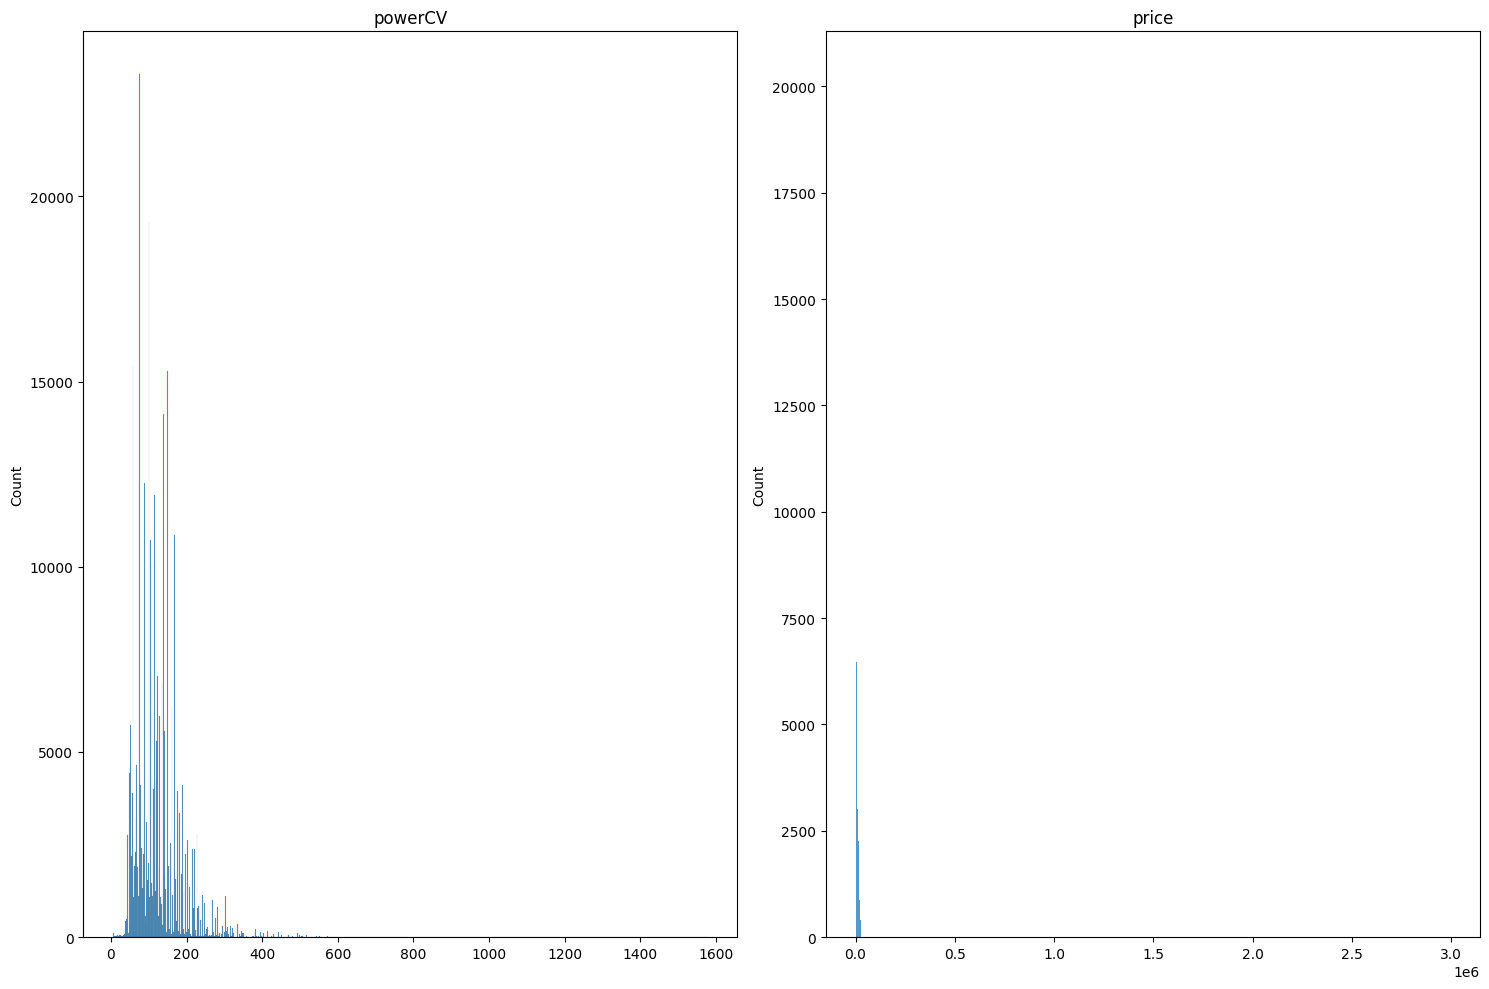

In [34]:
numericas, categoricas = separarar_df(df)
plot_numericas(numericas)

# Sobre la gráfica
Así de primeras podemos decir que la gran mayoría de los coches se encuentran alrededor de los 90 y los 2000, que la potencia se encuentra entre los 100 y 200 CV mayoritariamente y que el precio tiene muchos outliers
- En general hay bastantes outliers, pero son manejables

### Visualizar las categoricas con un countplot


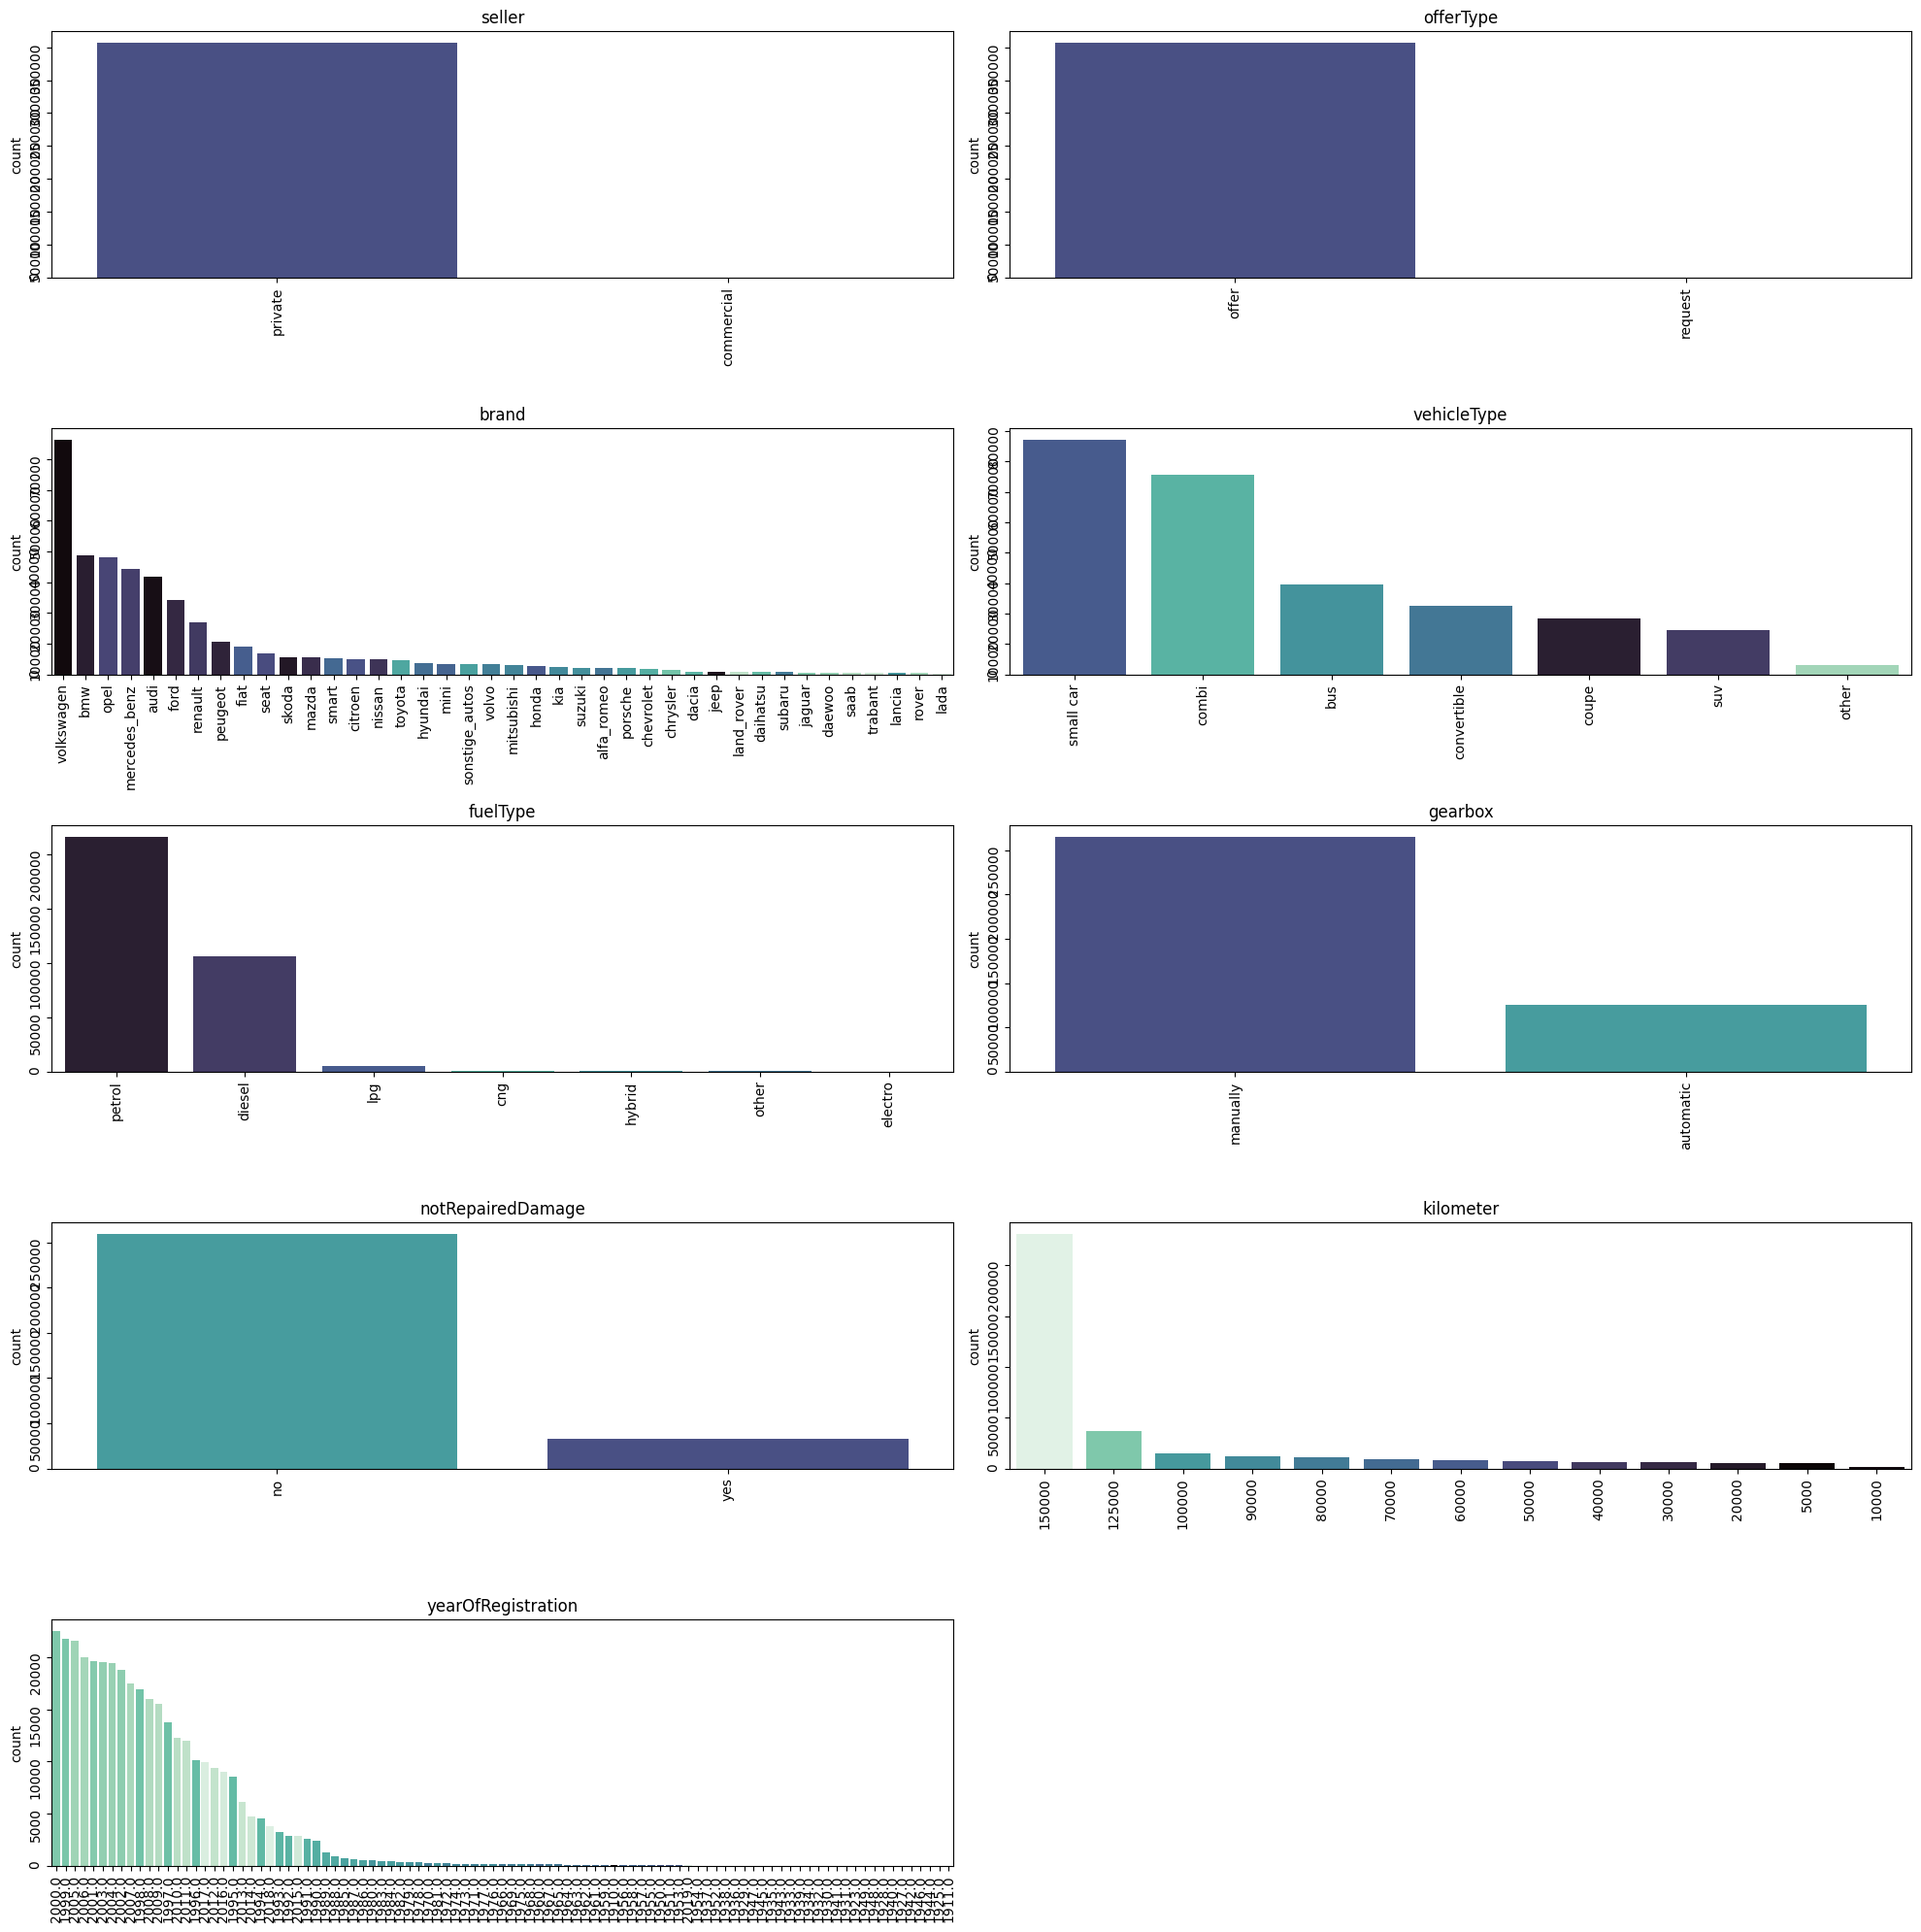

In [35]:
plot_categoricas(categoricas,grafica_size=(20,20))

# Sobre la gráfica
- Mayoritariamente los seller son privados
- Mayoritariamente son ventas, no subastas
- La marca más anunciada es volkswagen
- El tipo de vehiculo más anunciado es small car
- Los más anunciados son coches gasolina
- La caja de cambios más anunciada es la manual
- La gran mayoría de los coches no tienen daños
- La mayoría de los coches tienen 150000 km

### Visualizar los outliers con un boxplot


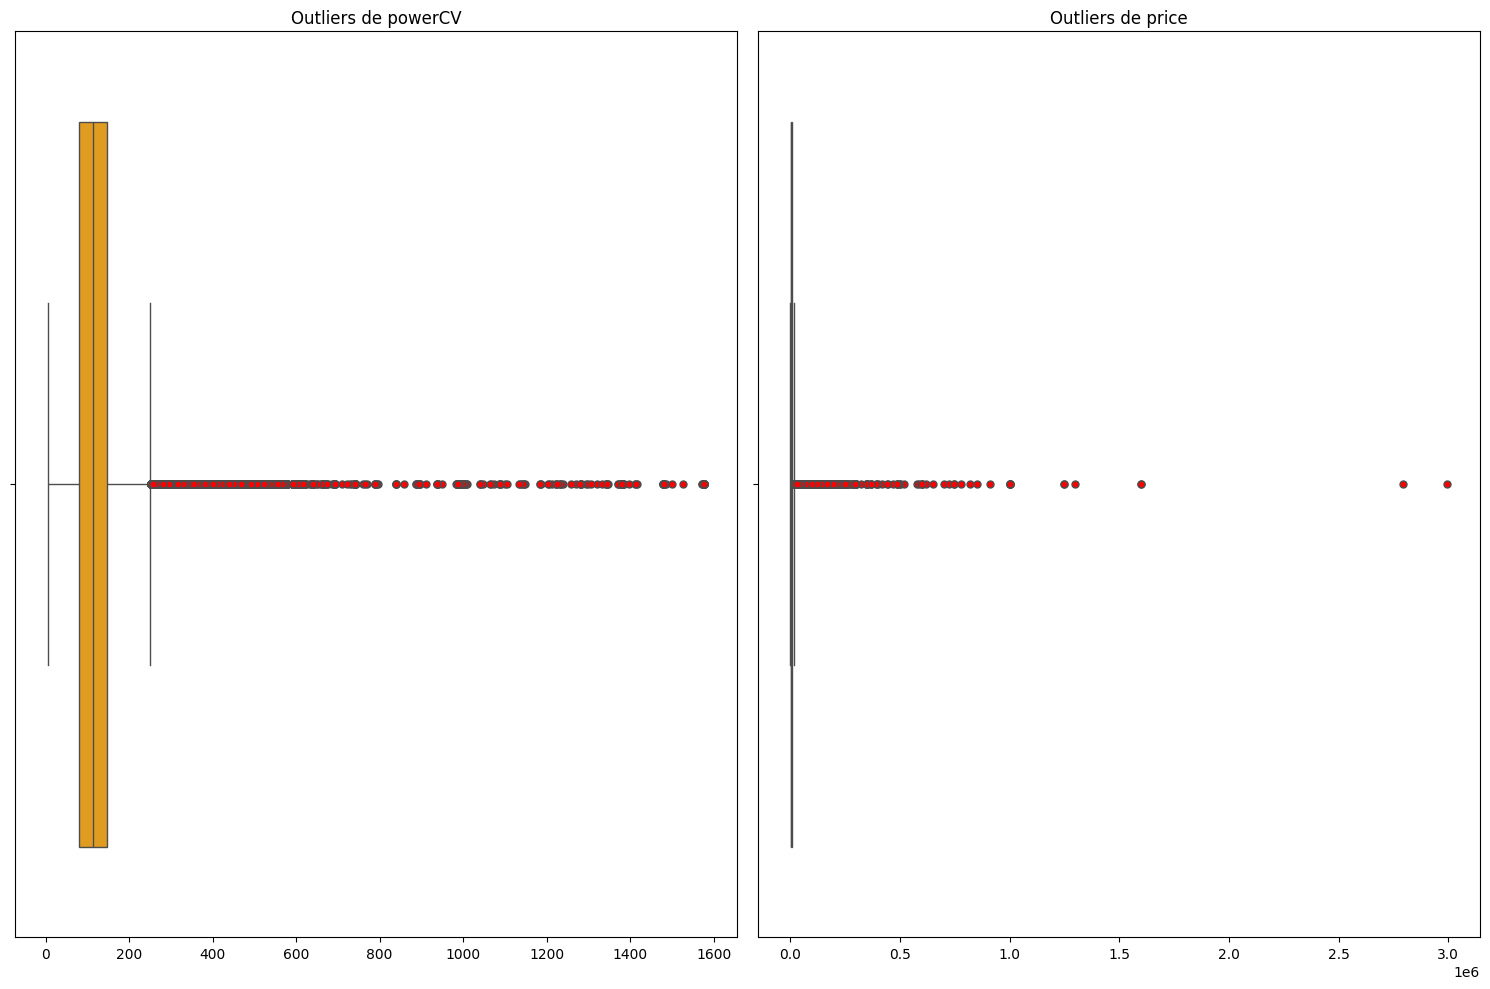

In [36]:
detectar_outliers(df)

# Sobre la gráfica
- Tenemos bastantantes outliers en todas las gráficas
- Hay que tener en cuenta que no todos los coches son iguales así que no tienen porque ser valores incorrectos (que lo pueden ser)
- El más preocupante diría que es precio con outliers tan elevados, aunque aún queda corregir nulos


### Visualizar correlacion con heatmap


Aquí vamos a realizar dos, una del df original y otra del df tal y como está ahora, para asegurarnos de que no hemos perdido nada importante

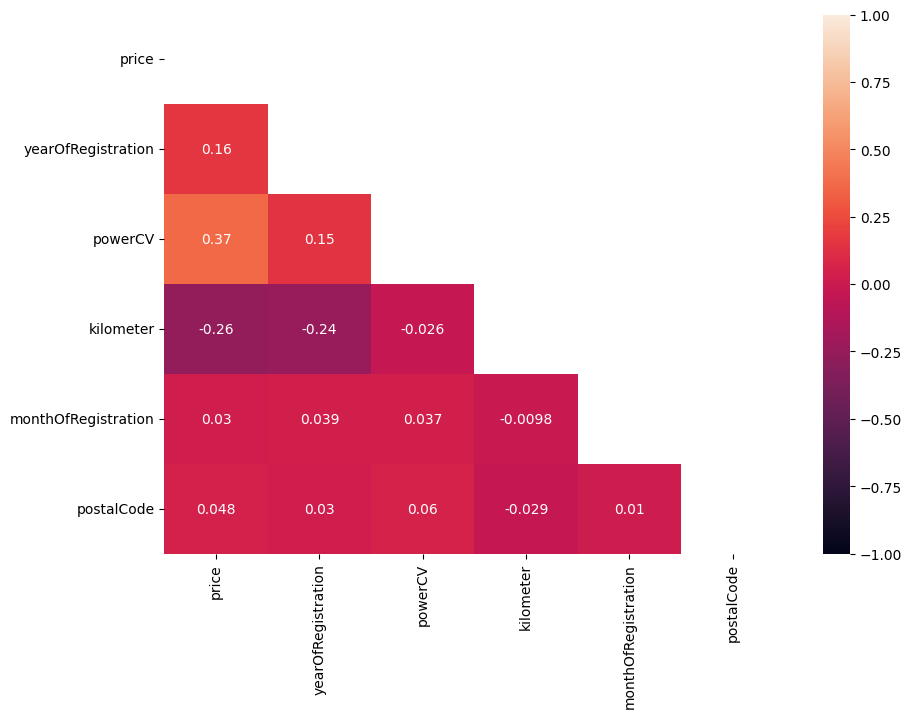

In [37]:
matriz_correlacion(df_old)

# Sobre la Gráfica
- Mayores correlaciones:
    - powerCV con price: 0.37
    - kilometer con price: 0.26
    - kilometer con yearofRegistration: 0.24 pero ahora es categórica,
    - yearofregist con Price: 0.16 pero ahora es categórica
    - powerCV con yearofRegistration: 0.15

    La correlación es baja, pero estás son las más altas, realmente deberíamos añadir los kilómetros (aqui me vuelvo a corregir eso)

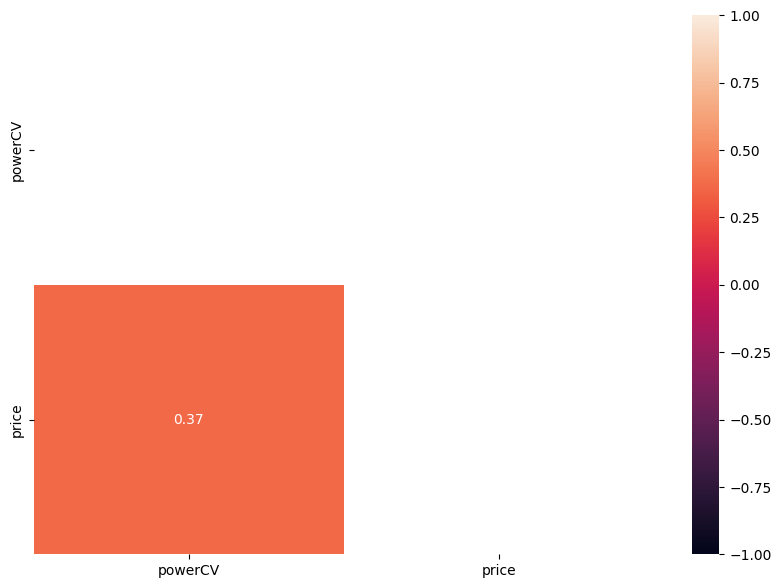

In [38]:
matriz_correlacion(df)

# Sobre la gráfica
- Viendo la anterior, hemos hecho bien, nos hemos quedado con los valores más correlacionados entre sí

### Visualizar categoricas vs variable respuesta(barplot)


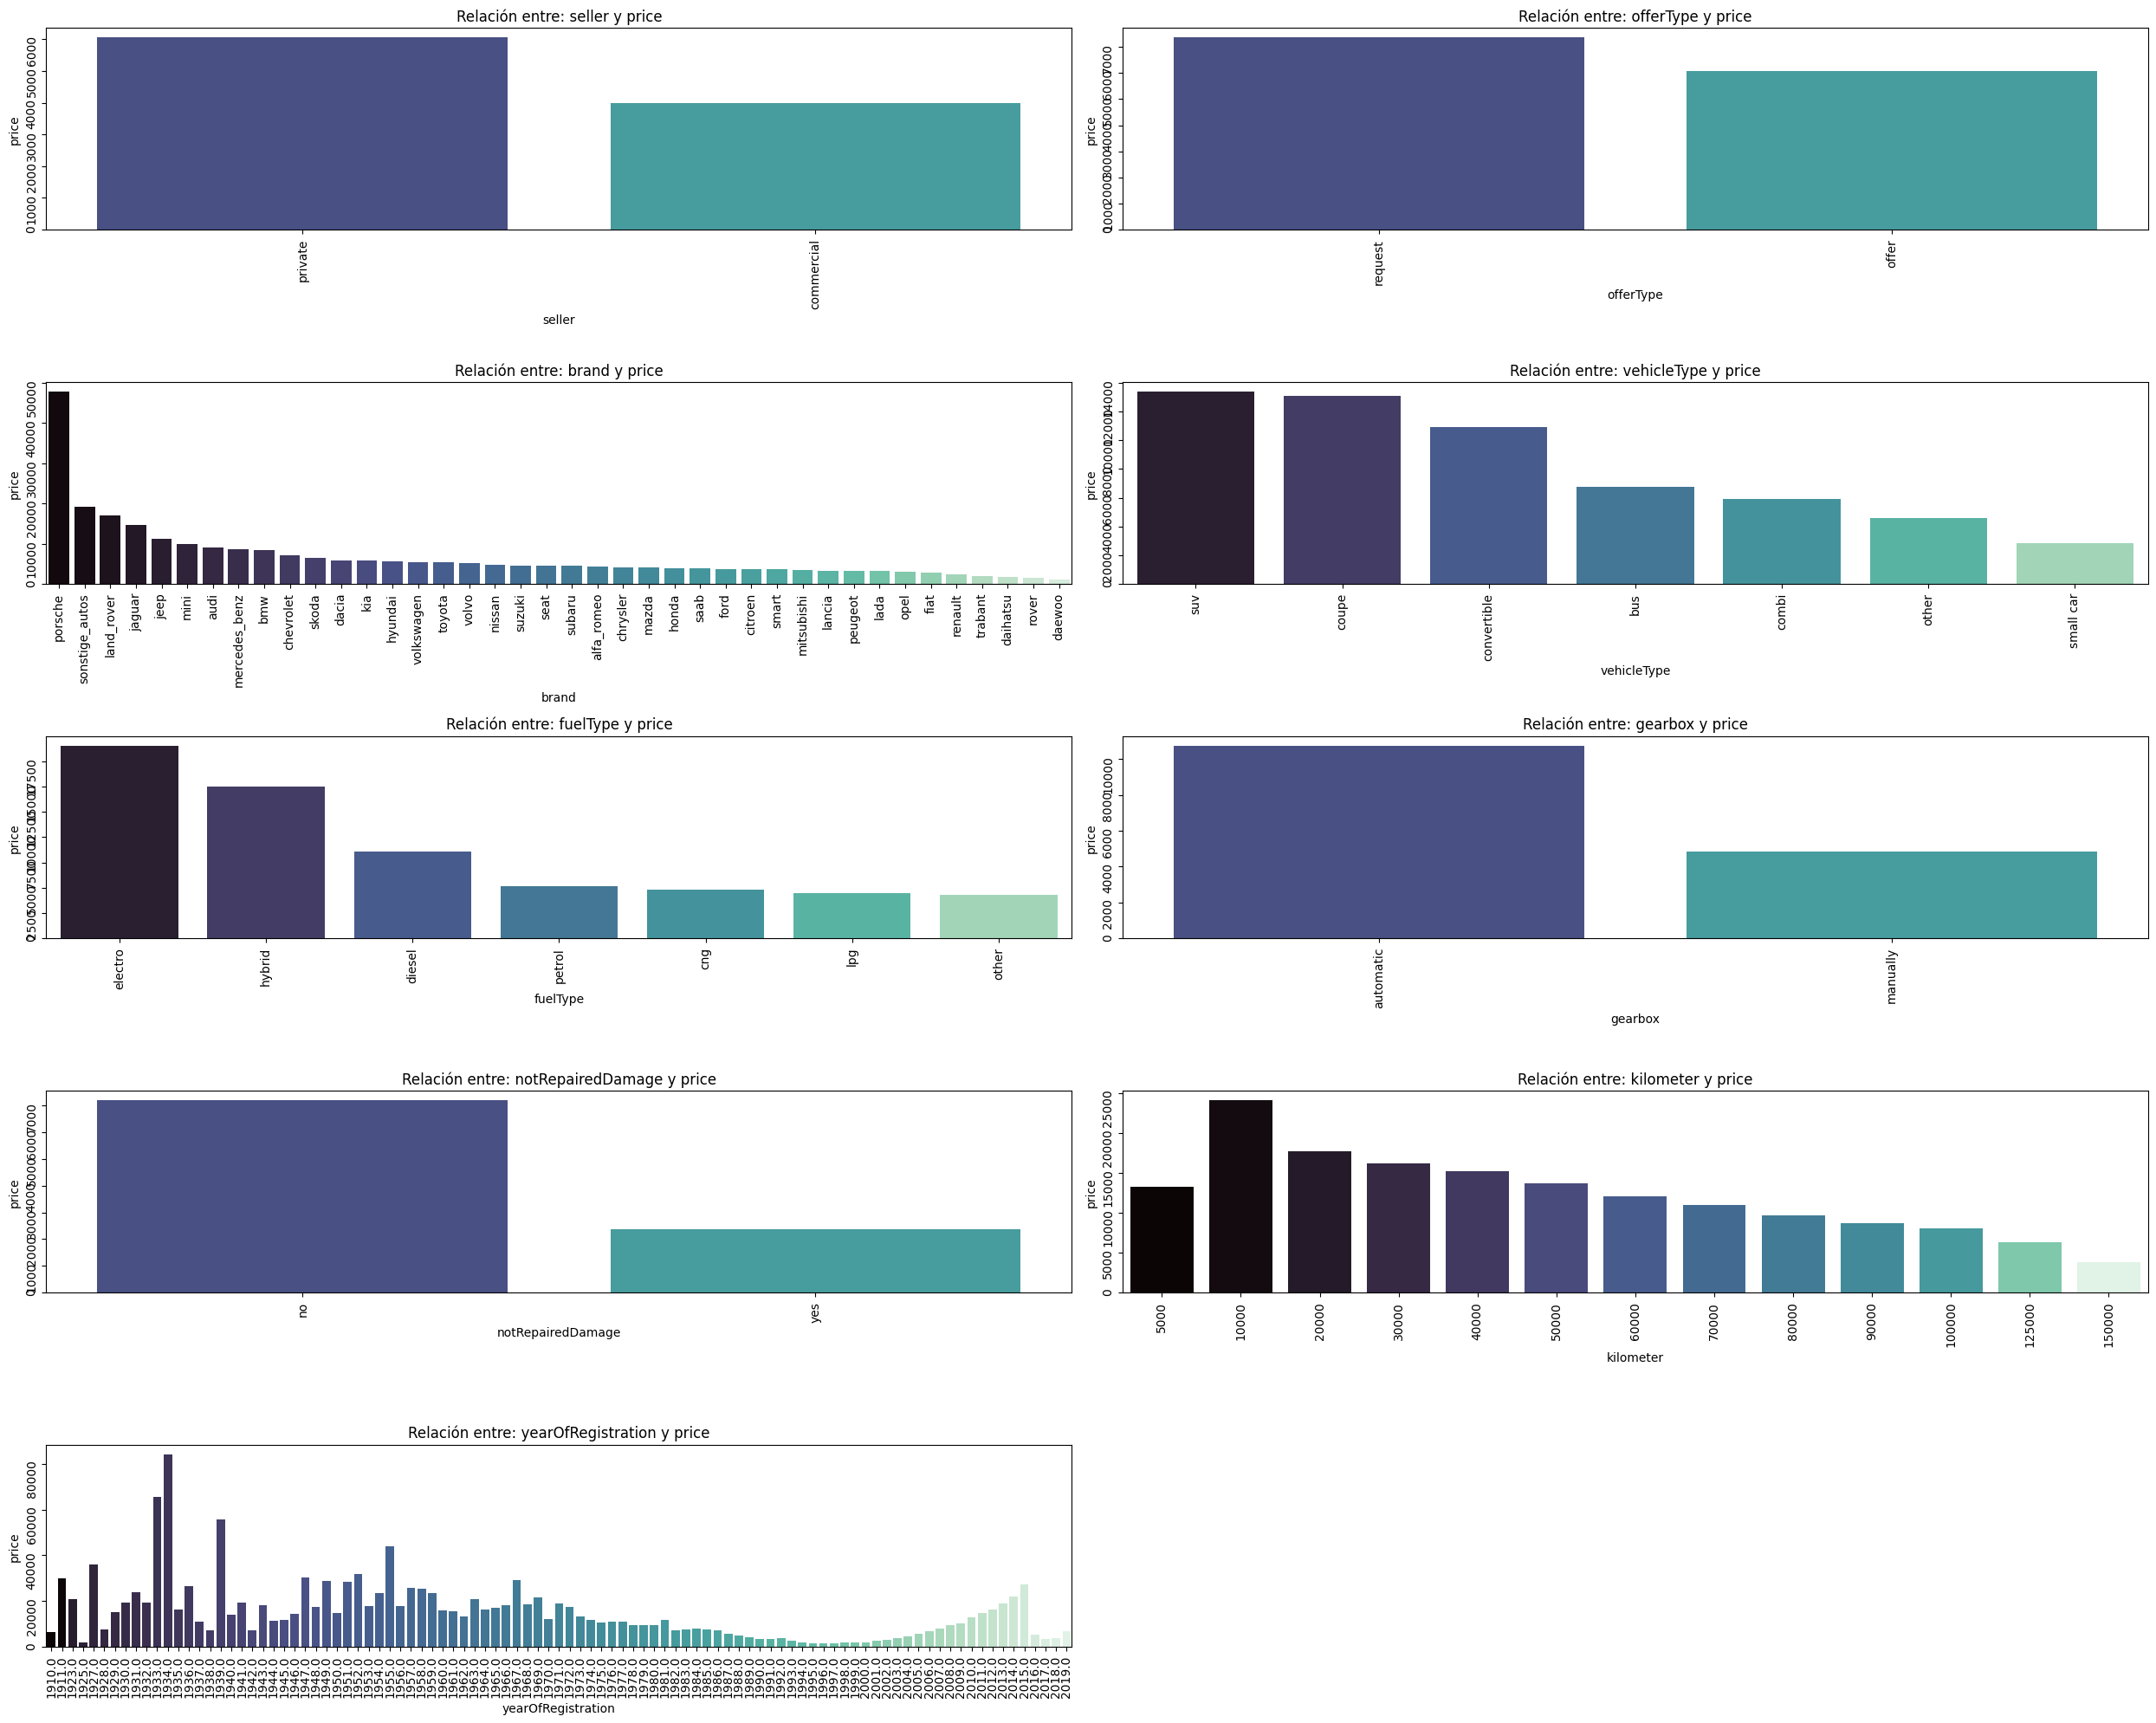

In [39]:
relacion_vr_categoricas(df,"price",grafica_size=(25,20))

# Sobre la gráfica
- El precio parece ser menor en promedio en las ventas de comercial, los privados sacan mças de promedio
- Las subastas sacan de promedio más dinero
- Porsche es el vehículo de promedio más caro | daewoo, rover, trabant... son de las más baratas.
- Los coupé y suvs son los más caros, small car el más barato.
- Los vehículos electrícos, híbridos y diesel los más caros, gasolina, cng y lpg son más baratos.
- Los automáticos son más caros que los manuales ( y menos divertidos).
- Los vehículos con daños sin reparar son mucho más baratos
- Los vehículos de 5000 km son más baratos que los de 10.000,20.000... revisar nulos
- Precio y registrationPrice, habrá que revisar, pero podrían ser vehículos de colección

### Visualizar numericas vs variable respuesta con un (scatterplot)

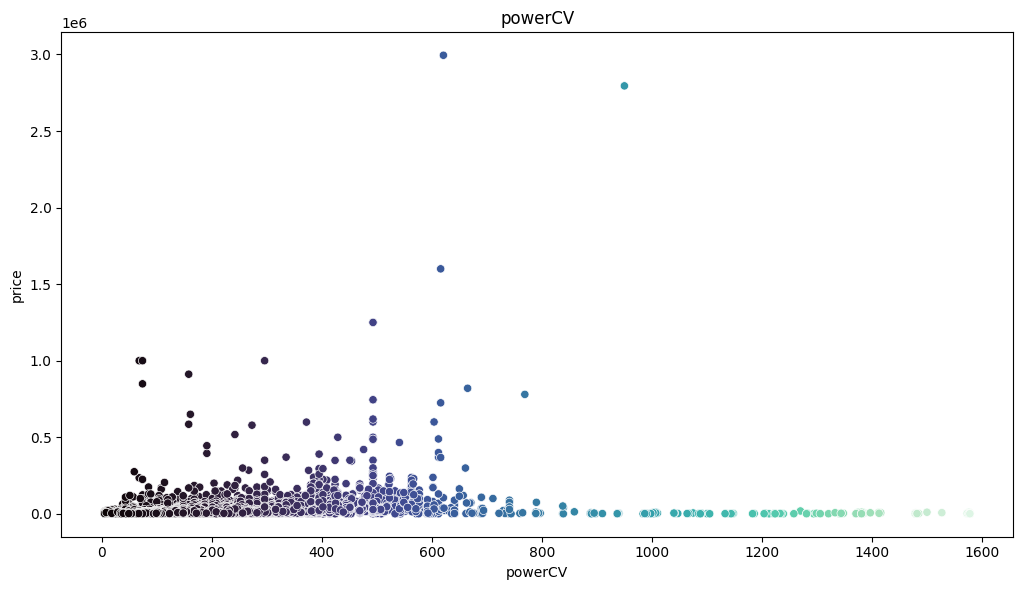

In [40]:
relacion_vr_numericas(df,"price",grafica_size=(20,6))

# Sobre la gráfica

- La mayoría de los coches tienen entre 0 y 400 CV de potencia
- outliers con coches de 800 CV, deberían ser de lujo o superdeportivos
- A partir de 800CV los vehículos son demasiado baratos es probable que sean valores incorrectos, los voy a nulificar?


In [41]:
cond = df["powerCV"] > 800
df[cond].shape

(145, 11)

Los voy a nulificar

In [42]:
cond = df["powerCV"] > 800
df[cond]["brand"].unique()

array(['toyota', 'mitsubishi', 'opel', 'honda', 'ford', 'nissan',
       'lancia', 'volvo', 'peugeot', 'sonstige_autos', 'citroen',
       'volkswagen', 'seat', 'kia', 'audi', 'bmw', 'renault',
       'mercedes_benz', 'mazda', 'skoda', 'mini', 'smart', 'daewoo',
       'hyundai'], dtype=object)

Son todo marcas que no han tenido esa potencia nunca (salvando mercedes y bmw)

In [43]:
condicion = df["powerCV"] > 800
c2 = df["brand"] != "bmw"
c3 = df["brand"] != "mercedes_benz"
df.loc[condicion & c2 & c3,"powerCV"] = np.nan


Ahora que ya hemos reducido los outliers excesivos, podemos empezar a trabajar los nulos

2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

Ahora vamos a rellenar nulos!

# Columnas categóricas

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356519 entries, 0 to 356518
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   seller              356519 non-null  object 
 1   offerType           356519 non-null  object 
 2   brand               356519 non-null  object 
 3   vehicleType         230772 non-null  object 
 4   fuelType            328217 non-null  object 
 5   gearbox             340232 non-null  object 
 6   notRepairedDamage   292100 non-null  object 
 7   kilometer           356519 non-null  object 
 8   powerCV             321169 non-null  float64
 9   price               356519 non-null  int64  
 10  yearOfRegistration  356401 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 29.9+ MB


In [45]:
exploracion_dataframe(df,"price")

El número de datos es 356519 y el de columnas es 11

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 50711

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,35.27
fuelType,7.94
gearbox,4.57
notRepairedDamage,18.07
powerCV,9.92
yearOfRegistration,0.03



 ..................... 

Los tipos de las columnas son:


,tipo_dato
seller,object
offerType,object
brand,object
vehicleType,object
fuelType,object
gearbox,object
notRepairedDamage,object
kilometer,object
powerCV,float64
price,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna SELLER tiene las siguientes valore únicos:


,count
seller,
private,356517
commercial,2


La columna OFFERTYPE tiene las siguientes valore únicos:


,count
offerType,
offer,356513
request,6


La columna BRAND tiene las siguientes valore únicos:


,count
brand,
volkswagen,76181
bmw,38870
opel,38083
mercedes_benz,34437
audi,31797


La columna VEHICLETYPE tiene las siguientes valore únicos:


,count
vehicleType,
small car,76950
combi,65738
bus,29666
convertible,22494
coupe,18360


La columna FUELTYPE tiene las siguientes valore únicos:


,count
fuelType,
petrol,216009
diesel,105906
lpg,5221
cng,555
hybrid,270


La columna GEARBOX tiene las siguientes valore únicos:


,count
gearbox,
manually,264823
automatic,75409


La columna NOTREPAIREDDAMAGE tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,258959
yes,33141


La columna KILOMETER tiene las siguientes valore únicos:


,count
kilometer,
150000,230351
125000,37126
100000,15321
90000,12299
80000,10854


La columna YEAROFREGISTRATION tiene las siguientes valore únicos:


,count
yearOfRegistration,
2000.00,22460
1999.00,21776
2005.00,21533
2006.00,19964
2001.00,19634


# Columnas Nulas
- vehicleType : Categórica
- fuelType	: Categórica
- gearbox : Categórica
- notRepairedDamage	: Categórica


### Vehicle Type

In [46]:
df["vehicleType"].unique()

array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)

Para la primera pondremos los nan en "other"

In [47]:
df["vehicleType"] = df["vehicleType"].fillna("other")
df["vehicleType"].unique()

array(['other', 'coupe', 'suv', 'small car', 'convertible', 'bus',
       'combi'], dtype=object)

### Fuel Type

In [48]:
df["fuelType"].unique()

array(['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro'], dtype=object)

Para fuel pondremos los nan en "other"

In [49]:
df["fuelType"] = df["fuelType"].fillna("other")
df["fuelType"].unique()

array(['petrol', 'diesel', 'other', 'lpg', 'hybrid', 'cng', 'electro'],
      dtype=object)

### Gearbox

In [50]:
df["gearbox"].unique()

array(['manually', 'automatic', nan], dtype=object)

Lo pondremos como unknown

In [51]:
df["gearbox"] = df["gearbox"].fillna("unknown")
df["gearbox"].unique()

array(['manually', 'automatic', 'unknown'], dtype=object)

### Not Repaired Damage

In [52]:
df["notRepairedDamage"].unique()

array([nan, 'yes', 'no'], dtype=object)

Lo pondremos como unknown

In [53]:
df["notRepairedDamage"] = df["notRepairedDamage"].fillna("unknown")
df["notRepairedDamage"].unique()

array(['unknown', 'yes', 'no'], dtype=object)

### Registered

Vamos a crear una buena categoría, veamos años únicos

In [54]:
df["yearOfRegistration"].sort_values().unique()

array([1910.0, 1911.0, 1923.0, 1925.0, 1927.0, 1928.0, 1929.0, 1930.0,
       1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0,
       1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0,
       1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0,
       1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0,
       1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0,
       1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0,
       1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0,
       1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0,
       1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0,
       2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0,
       2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0,
       2019.0, nan], dtype=object)

va de 1910 a 2019, vamos a realizar las siguientes categorías
- 'Los 1910s',
- 'Los 1920s',
- 'Los 1930s',
- 'Los 1940s',
- 'Los 1950s',
- 'Los 1960s',
- 'Los 1970s',
- 'Los 80',
- 'Los 90',
- 'Los 2000',
- 'Los 2010'

Como lo hare? la década la puedo sacar dividiendo por 10 absoluto (//) y multiplicando por 10


In [55]:
df["yearOfRegistration"] = df["yearOfRegistration"] //10 * 10
df["yearOfRegistration"].sort_values().unique()


array([1910.0, 1920.0, 1930.0, 1940.0, 1950.0, 1960.0, 1970.0, 1980.0,
       1990.0, 2000.0, 2010.0, nan], dtype=object)

Ahora paso a una lista esto, y genero un diccionario! 

In [56]:
years = df["yearOfRegistration"].sort_values().unique()
lista_years = years.tolist()
lista_decadas = ["The 10's","The 20's","The 30's","The 40's","The 50's","The 60's","The 70's","The 80's","The 90's","The 2000","The 2010","unknown"]
dictio_decada = {}
for i, year in enumerate(lista_years):
    try:
        yeah = int(year)
    except: 
        yeah = np.nan
    dictio_decada[yeah] = lista_decadas[i]

dictio_decada

{1910: "The 10's",
 1920: "The 20's",
 1930: "The 30's",
 1940: "The 40's",
 1950: "The 50's",
 1960: "The 60's",
 1970: "The 70's",
 1980: "The 80's",
 1990: "The 90's",
 2000: 'The 2000',
 2010: 'The 2010',
 nan: 'unknown'}

Y ahora reemplazamos

In [57]:
df["yearOfRegistration"] = df["yearOfRegistration"].map(dictio_decada)

In [58]:
df.sample(5)

,seller,offerType,brand,vehicleType,fuelType,gearbox,notRepairedDamage,kilometer,powerCV,price,yearOfRegistration
66077,private,offer,opel,small car,petrol,manually,no,150000,74.00,2200,The 2000
265981,private,offer,mercedes_benz,combi,other,automatic,no,125000,161.00,5200,The 2000
46919,private,offer,seat,small car,petrol,manually,no,150000,49.00,799,The 90's
50150,private,offer,peugeot,bus,diesel,manually,no,70000,109.00,11700,The 2010
69338,private,offer,volkswagen,bus,diesel,manually,unknown,80000,178.00,32500,The 2010


Para ver si han cambiado los datos, vamos a guardar el df aquí

In [59]:
df_previo = df.copy()

Hagamos dos dataframes para ver que metodo de imputación funciona mejor

In [60]:
df1 = df.copy()
df2 = df.copy()

# Columnas numéricas
### Nulas
- powerCV	: numérica
- price	: numérica
- yearOfRegistration : numérica

Veamos información sobre los mismos:


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
powerCV,321169.00,124.71,62.37,5.00,79.00,114.00,148.00,1578.00
price,356519.00,6065.20,14028.59,150.00,1300.00,3150.00,7500.00,2995000.00


In [62]:
df1.isnull().sum()

seller                    0
offerType                 0
brand                     0
vehicleType               0
fuelType                  0
gearbox                   0
notRepairedDamage         0
kilometer                 0
powerCV               35350
price                     0
yearOfRegistration        0
dtype: int64

Realizamos el KNN Imputer

In [63]:
df_num = df1.select_dtypes(include=np.number)
imputer_knn = KNNImputer(n_neighbors=5)
knn_imputado = imputer_knn.fit_transform(df_num)
df_num_sin_nulos = pd.DataFrame(knn_imputado,columns=df_num.columns)
df_knn = df1.copy()
df1[df_num.columns] = df_num_sin_nulos
df1.isnull().sum()


seller                0
offerType             0
brand                 0
vehicleType           0
fuelType              0
gearbox               0
notRepairedDamage     0
kilometer             0
powerCV               0
price                 0
yearOfRegistration    0
dtype: int64

Tarda 18 Minutos

Ahora hacemos el Iterative

In [64]:
df2.isnull().sum()

seller                    0
offerType                 0
brand                     0
vehicleType               0
fuelType                  0
gearbox                   0
notRepairedDamage         0
kilometer                 0
powerCV               35350
price                     0
yearOfRegistration        0
dtype: int64

In [65]:
df_num = df2.select_dtypes(include=np.number)
imputer_iterative = IterativeImputer(max_iter=20,random_state=42)
iterative_imputado = imputer_iterative.fit_transform(df_num)
df_num_sin_nulos = pd.DataFrame(knn_imputado,columns=df_num.columns)
df_iterative = df2.copy()
df2[df_num.columns] = df_num_sin_nulos
df2.isnull().sum()

seller                0
offerType             0
brand                 0
vehicleType           0
fuelType              0
gearbox               0
notRepairedDamage     0
kilometer             0
powerCV               0
price                 0
yearOfRegistration    0
dtype: int64

# Comparamos métodos

### KNN vs OG

In [66]:
diferencia_tras_rellenar_nulos(df_previo,df1)


 ..................... 

Estadísticas antes de la operación:


,count,mean,std,min,25%,50%,75%,max
powerCV,321169.00,124.71,62.37,5.00,79.00,114.00,148.00,1578.00
price,356519.00,6065.20,14028.59,150.00,1300.00,3150.00,7500.00,2995000.00



 ..................... 

Estadísticas después de la operación:


,count,mean,std,min,25%,50%,75%,max
powerCV,356519.00,122.95,60.62,5.00,79.40,111.20,148.00,1578.00
price,356519.00,6065.20,14028.59,150.00,1300.00,3150.00,7500.00,2995000.00



 ..................... 

Diferencia porcentual:


,count,mean,std,min,25%,50%,75%,max
powerCV,11.01,-1.41,-2.81,0.00,0.51,-2.46,0.00,0.00
price,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Iterative vs OG

In [67]:
diferencia_tras_rellenar_nulos(df_previo,df2)


 ..................... 

Estadísticas antes de la operación:


,count,mean,std,min,25%,50%,75%,max
powerCV,321169.00,124.71,62.37,5.00,79.00,114.00,148.00,1578.00
price,356519.00,6065.20,14028.59,150.00,1300.00,3150.00,7500.00,2995000.00



 ..................... 

Estadísticas después de la operación:


,count,mean,std,min,25%,50%,75%,max
powerCV,356519.00,122.95,60.62,5.00,79.40,111.20,148.00,1578.00
price,356519.00,6065.20,14028.59,150.00,1300.00,3150.00,7500.00,2995000.00



 ..................... 

Diferencia porcentual:


,count,mean,std,min,25%,50%,75%,max
powerCV,11.01,-1.41,-2.81,0.00,0.51,-2.46,0.00,0.00
price,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Entre ellos

In [68]:
diferencia_tras_rellenar_nulos(df1,df2)


 ..................... 

Estadísticas antes de la operación:


,count,mean,std,min,25%,50%,75%,max
powerCV,356519.00,122.95,60.62,5.00,79.40,111.20,148.00,1578.00
price,356519.00,6065.20,14028.59,150.00,1300.00,3150.00,7500.00,2995000.00



 ..................... 

Estadísticas después de la operación:


,count,mean,std,min,25%,50%,75%,max
powerCV,356519.00,122.95,60.62,5.00,79.40,111.20,148.00,1578.00
price,356519.00,6065.20,14028.59,150.00,1300.00,3150.00,7500.00,2995000.00



 ..................... 

Diferencia porcentual:


,count,mean,std,min,25%,50%,75%,max
powerCV,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
price,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Conclusiones

Como hemos tratado y gestionado los nulos y datos, da igual el método que uses, pues sabe llegar a un resultado muy parecido!

In [72]:
df1.to_csv("../../datos/01_Modelo1/02_autorenew_sin_nulos.csv")

# Gráficas Ahora!
Cómo se nos queda?

### Visualizar las numéricas con un histplot


In [73]:
df = pd.read_csv("../../datos/01_Modelo1/02_autorenew_sin_nulos.csv",index_col=0)
df["kilometer"] = df["kilometer"].astype(object)

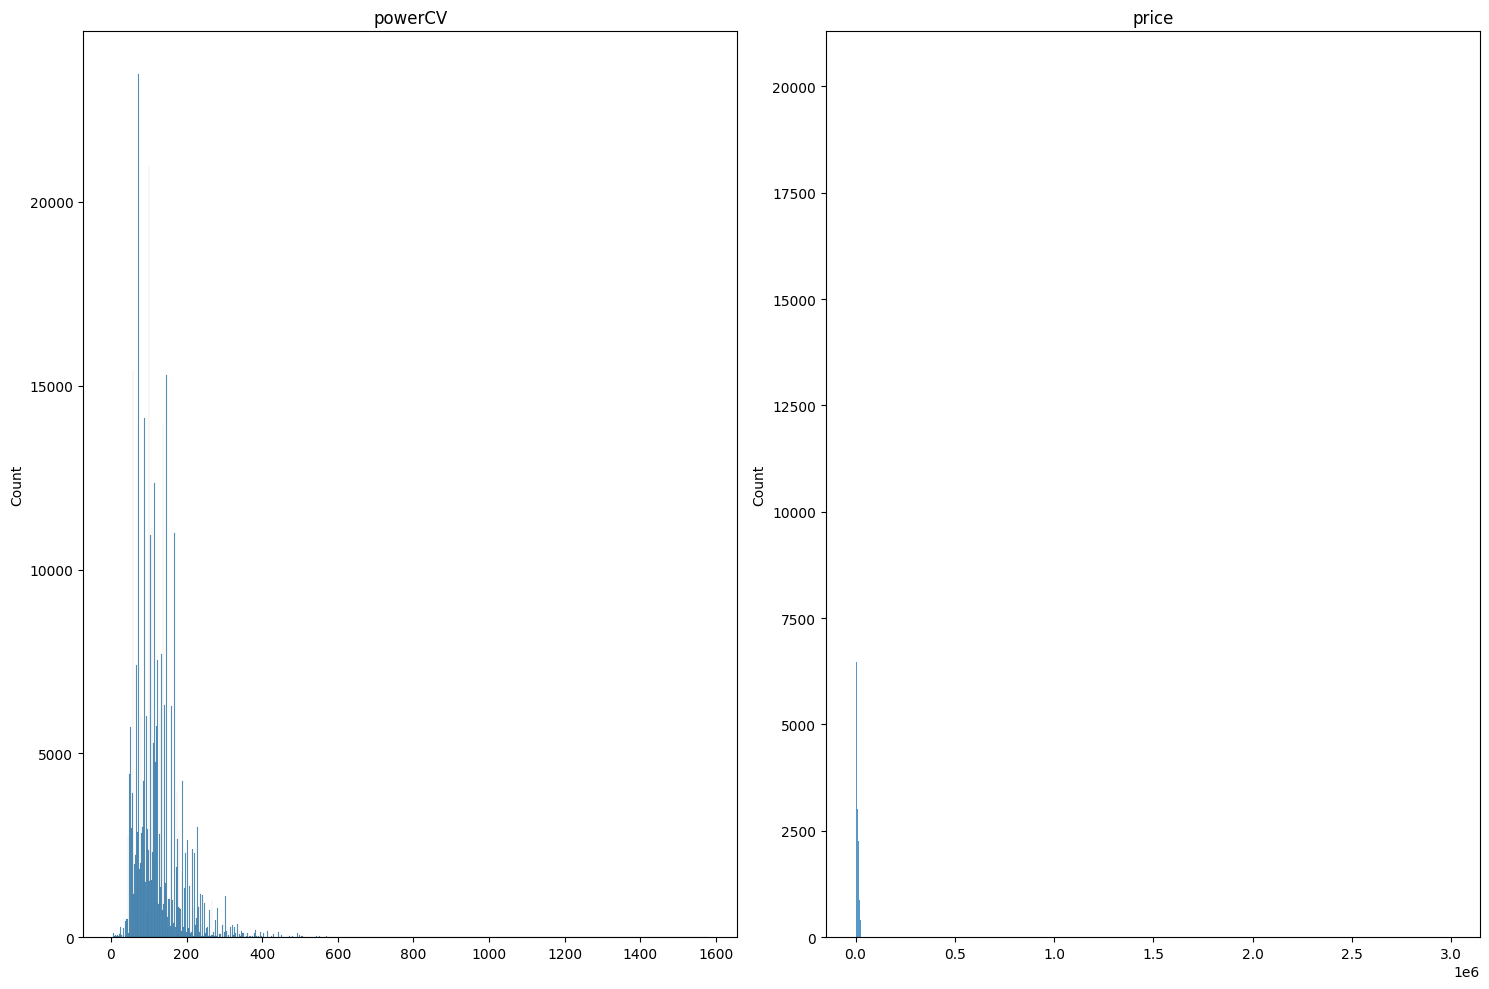

In [76]:
numericas, categoricas = separarar_df(df)
plot_numericas(numericas)

### Visualizar las categoricas con un countplot

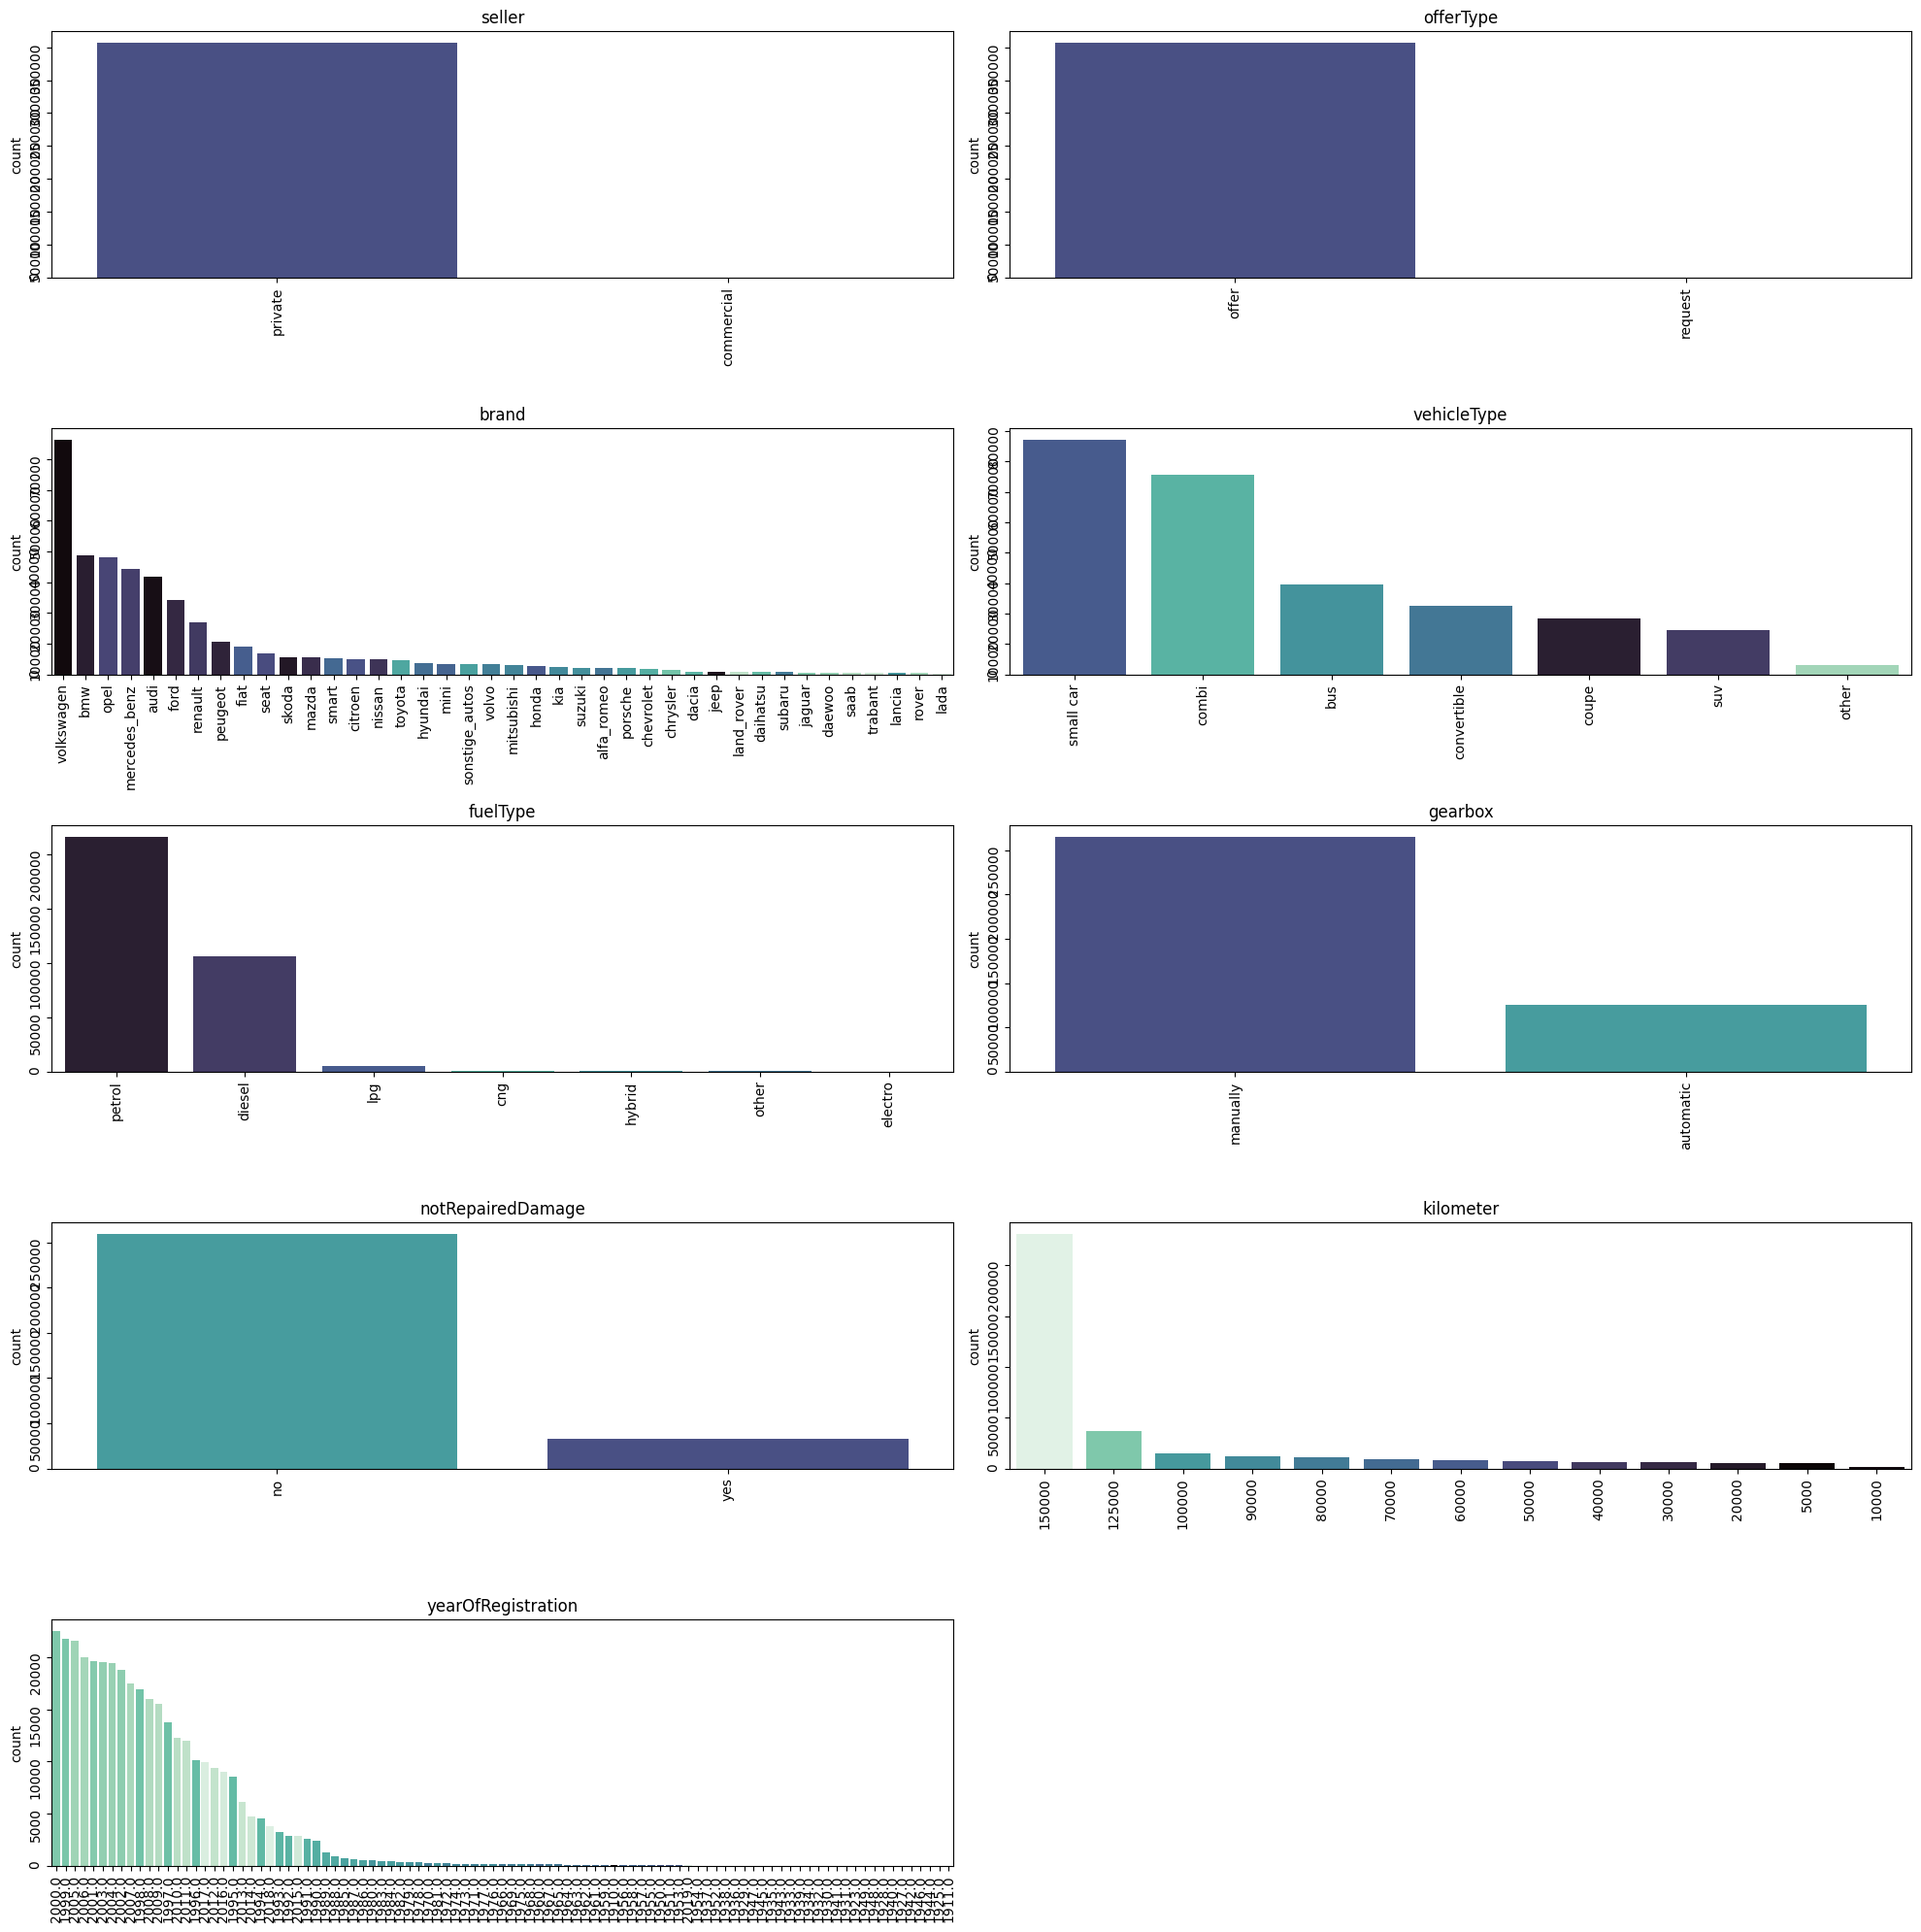

In [74]:
plot_categoricas(categoricas,grafica_size=(20,20))

### Visualizar los outliers con un boxplot

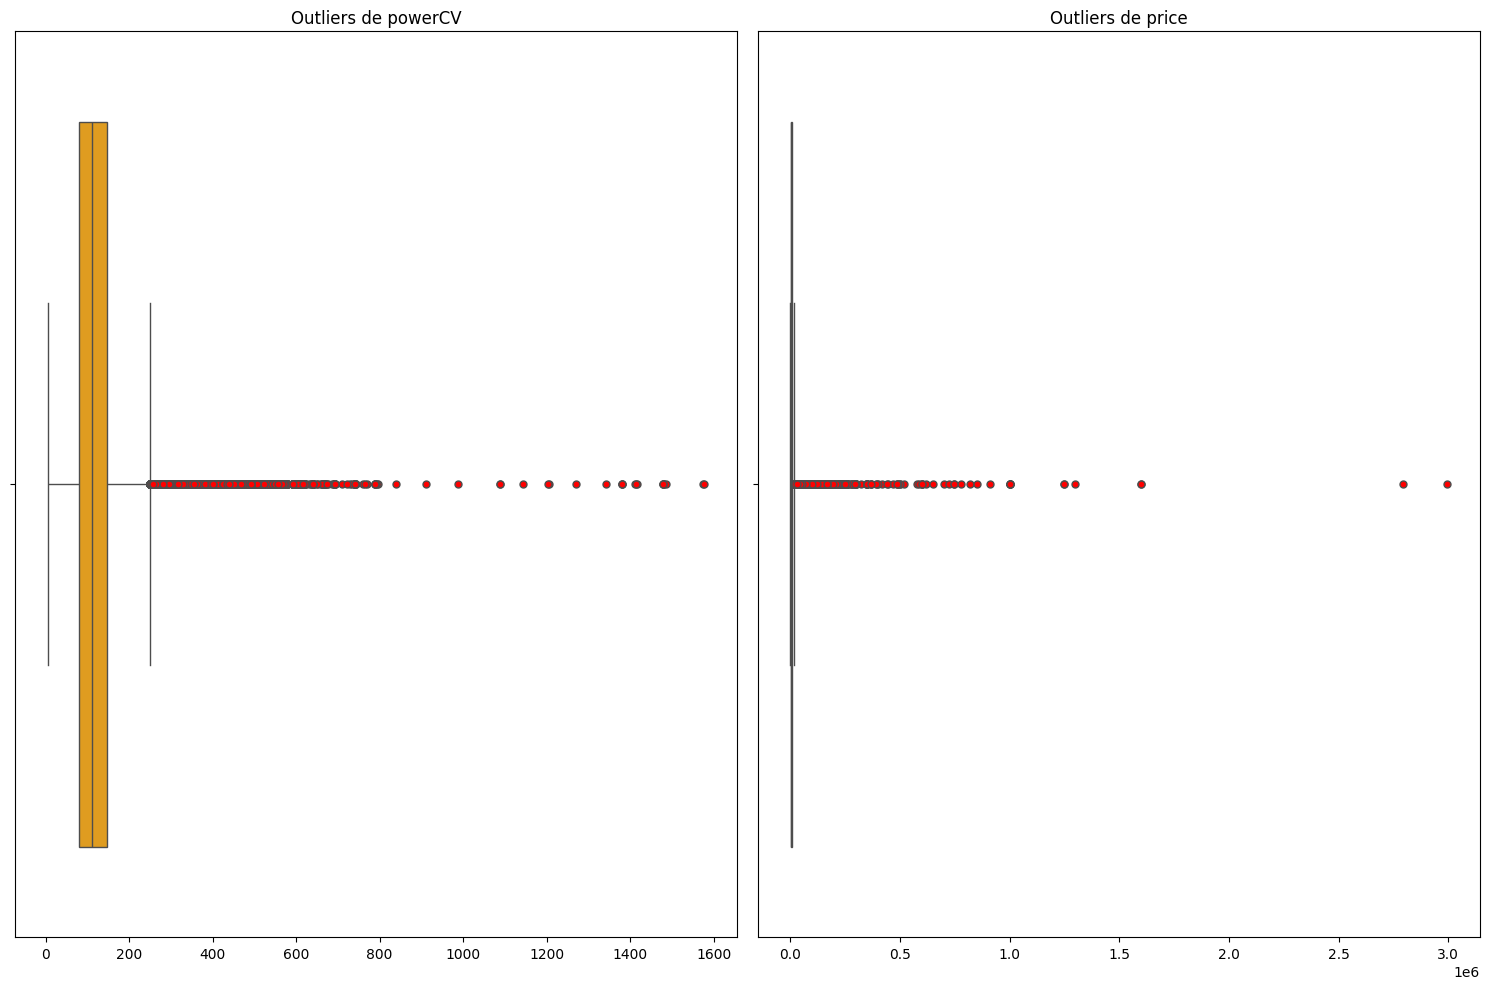

In [77]:
detectar_outliers(df)

# Matriz Correlación

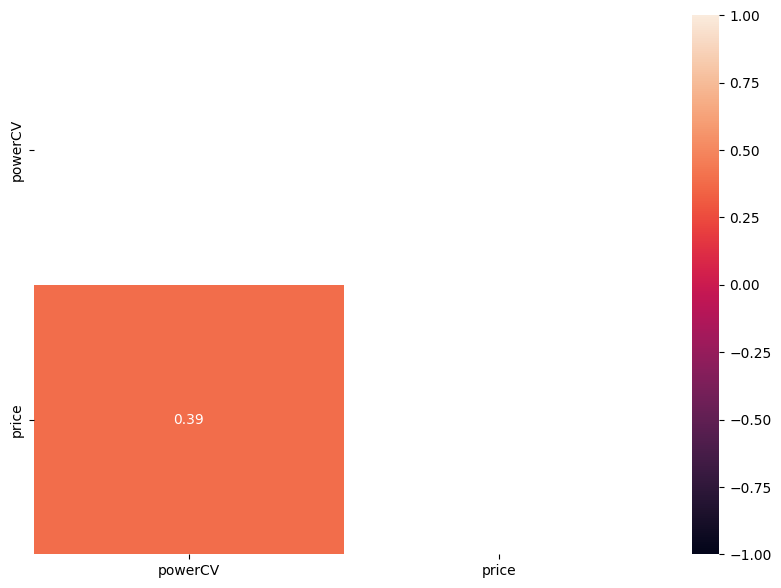

In [78]:
matriz_correlacion(df)

### Visualizar categoricas vs variable respuesta(barplot)


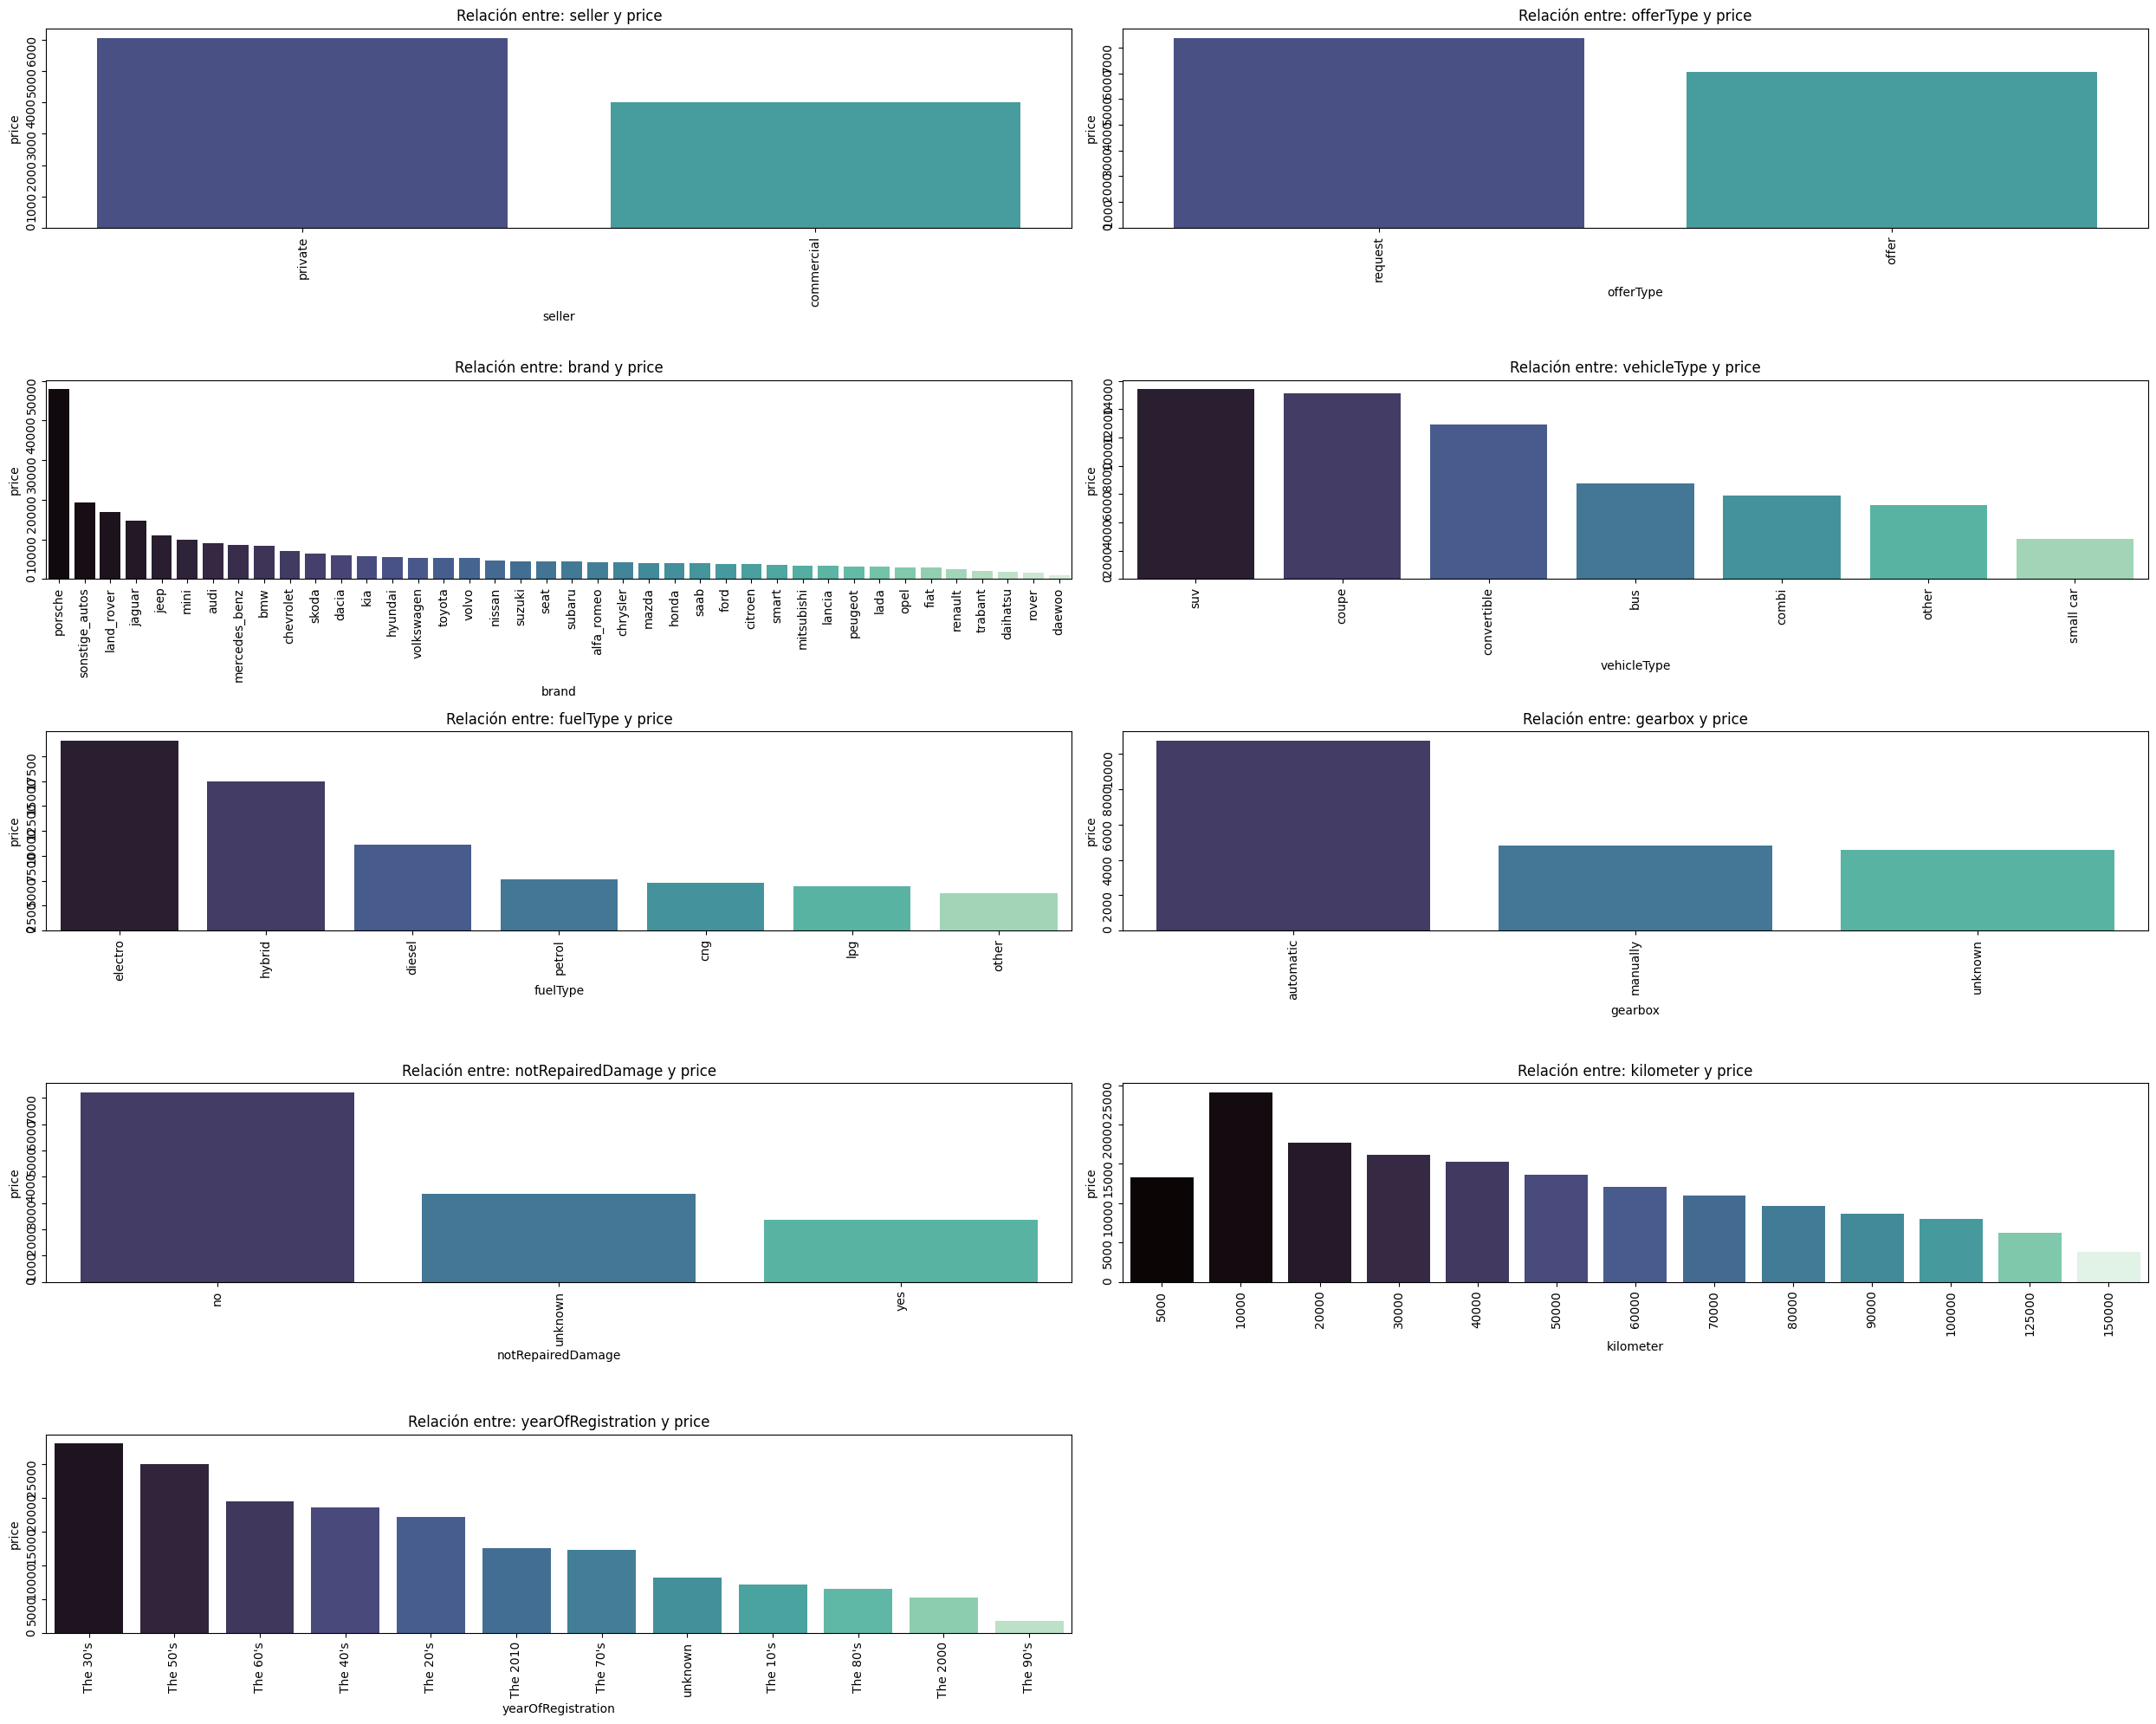

In [79]:
relacion_vr_categoricas(df,"price",grafica_size=(25,20))

### Visualizar numericas vs variable respuesta con un (scatterplot)

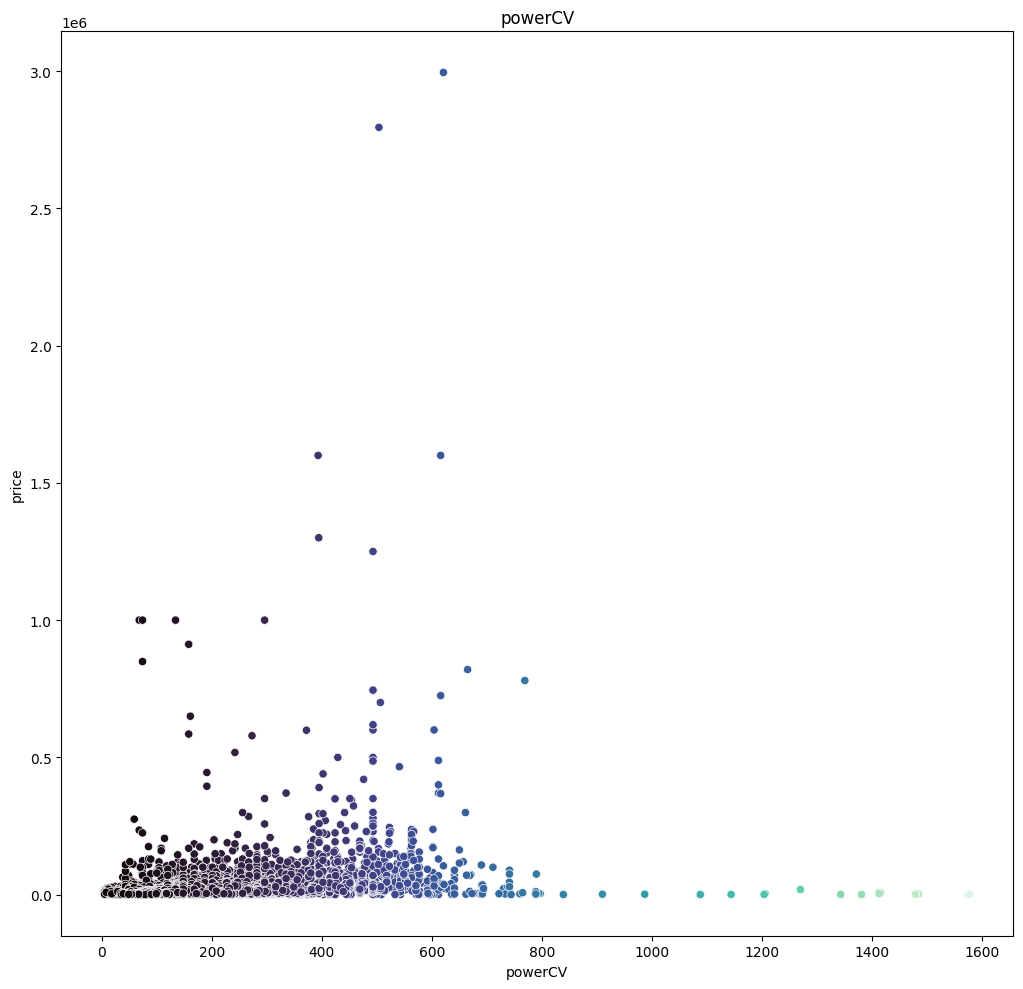

In [80]:
relacion_vr_numericas(df,"price",grafica_size=(20,10))

In [81]:
df.isnull().sum()

seller                0
offerType             0
brand                 0
vehicleType           0
fuelType              0
gearbox               0
notRepairedDamage     0
kilometer             0
powerCV               0
price                 0
yearOfRegistration    0
dtype: int64